# Analisis de un portafolio con varios activos

## Instalar paquetes

In [ ]:
#Instalar paquetes necesarios
!pip install yfinance
!pip install fix_yahoo_finance

import warnings
import datetime
import numpy as np
import pandas as pd
import pandas_datareader.data as pdr
import matplotlib.pyplot as plt
import yfinance as yf

warnings.simplefilter('ignore', FutureWarning)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 KB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.2/111.2 KB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 41.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 KB 8.8 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
   

## Crear función descargar datos

In [ ]:
# Crear función para descargar información de varios activos al mismo tiempo
# Los datos quedan guardados en un activo tipo pandas.core
def getMultiAssetData(ticketList, start_date, end_date):
    def getData(ticker):
        data = yf.download(ticker, start_date, end_date)
        return data
    datas = map(getData, ticketList) #Aplicar la función GetData al array "TicketList"
    return pd.concat(datas, keys=ticketList, names=['Ticker', 'Date'])

## Descargar datos

In [ ]:
Lista = ['AAPL', 'AMZN','BAC', 'JNJ', 'KO', 'XOM', 'PG','BTC-USD','WMT','PFE','MSFT','GOOG']
inicio = '2013-01-01'
final = '2023-01-01'

In [ ]:
data=getMultiAssetData(ticketList=Lista, start_date=inicio, end_date=final)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
df = data.copy()
df.describe

<bound method NDFrame.describe of                         Open       High        Low      Close  Adj Close  \
Ticker Date                                                                
AAPL   2013-01-02  19.779285  19.821428  19.343929  19.608213  16.837120   
       2013-01-03  19.567142  19.631071  19.321428  19.360714  16.624594   
       2013-01-04  19.177500  19.236786  18.779642  18.821428  16.161518   
       2013-01-07  18.642857  18.903570  18.400000  18.710714  16.066454   
       2013-01-08  18.900356  18.996071  18.616072  18.761070  16.109695   
...                      ...        ...        ...        ...        ...   
GOOG   2022-12-23  87.620003  90.099998  87.620003  89.809998  89.809998   
       2022-12-27  89.309998  89.500000  87.535004  87.930000  87.930000   
       2022-12-28  87.500000  88.519997  86.370003  86.459999  86.459999   
       2022-12-29  87.029999  89.364998  86.989998  88.949997  88.949997   
       2022-12-30  87.364998  88.830002  87.029999  88

Al descargar los datos por acción estos van a ser guardados en una especie de armario, donde hay una "caja" con la información de cada acción. Entonces cada "caja" de acción guardada en el armario "df" puede ser llamada con la función de atributo ".loc"

In [ ]:
df.loc['JNJ']

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-01-02,71.019997,71.019997,70.300003,70.839996,53.573425,12874200
2013-01-03,70.980003,71.000000,70.449997,70.739998,53.497810,9598300
2013-01-04,71.239998,71.730003,71.010002,71.550003,54.110363,11631800
2013-01-07,71.500000,71.529999,71.190002,71.400002,53.996933,7548800
2013-01-08,71.309998,71.650002,71.250000,71.410004,54.004501,9825300
...,...,...,...,...,...,...
2022-12-23,176.669998,177.520004,175.809998,177.479996,176.212601,3683400
2022-12-27,178.110001,178.350006,176.990005,177.429993,176.162949,3067300
2022-12-28,177.759995,178.449997,176.649994,176.660004,175.398468,2645400


Igualmente, se puede revisar las columnas comunes en cada "caja" usando doble corchete "[["

In [ ]:
df[['Close']]

Close
Ticker Date                 
AAPL   2013-01-02  19.608213
       2013-01-03  19.360714
       2013-01-04  18.821428
       2013-01-07  18.710714
       2013-01-08  18.761070
...                      ...
GOOG   2022-12-23  89.809998
       2022-12-27  87.930000
       2022-12-28  86.459999
       2022-12-29  88.949997
       2022-12-30  88.730003

[30726 rows x 1 columns]

## Retornos diarios

In [ ]:
df = data.copy()
closePrice = df[['Close']]
closePrice = closePrice.reset_index()
closePriceTable = closePrice.pivot(index='Date', columns='Ticker', values='Close')
closePriceTable.tail()

Ticker,AAPL,AMZN,BAC,BTC-USD,GOOG,JNJ,KO,MSFT,PFE,PG,WMT,XOM
Date,,,,,,,,,,,,
2022-12-27,130.029999,83.040001,32.529999,16717.173828,87.930000,177.429993,64.209999,236.960007,51.130001,153.949997,143.809998,110.190002
2022-12-28,126.040001,81.820000,32.770000,16552.572266,86.459999,176.660004,63.570000,234.529999,50.799999,151.960007,141.289993,108.379997
2022-12-29,129.610001,84.180000,33.139999,16642.341797,88.949997,177.559998,63.950001,241.009995,51.330002,152.589996,142.149994,109.199997
2022-12-30,129.929993,84.000000,33.119999,16602.585938,88.730003,176.649994,63.610001,239.820007,51.240002,151.559998,141.789993,110.300003
2022-12-31,NaN,NaN,NaN,16547.496094,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
returns_portfolio_ln = np.log(closePriceTable)-np.log(closePriceTable.shift(1))
returns_portfolio_ln.tail()

Ticker,AAPL,AMZN,BAC,BTC-USD,GOOG,JNJ,KO,MSFT,PFE,PG,WMT,XOM
Date,,,,,,,,,,,,
2022-12-27,NaN,NaN,NaN,-0.012048,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-12-28,-0.031166,-0.014801,0.007351,-0.009895,-0.016859,-0.004349,-0.010017,-0.010308,-0.006475,-0.013010,-0.017678,-0.016563
2022-12-29,0.027931,0.028436,0.011228,0.005409,0.028393,0.005082,0.005960,0.027255,0.010379,0.004137,0.006068,0.007537
2022-12-30,0.002466,-0.002141,-0.000604,-0.002392,-0.002476,-0.005138,-0.005331,-0.004950,-0.001755,-0.006773,-0.002536,0.010023
2022-12-31,NaN,NaN,NaN,-0.003324,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
returns_portfolio_ln=returns_portfolio_ln.dropna()

## Gráfica e información de distribuciones por activo

<ipython-input-62-56b90dc7e4f7>:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  returns_portfolio_ln.hist(bins=50, ax=ax2)


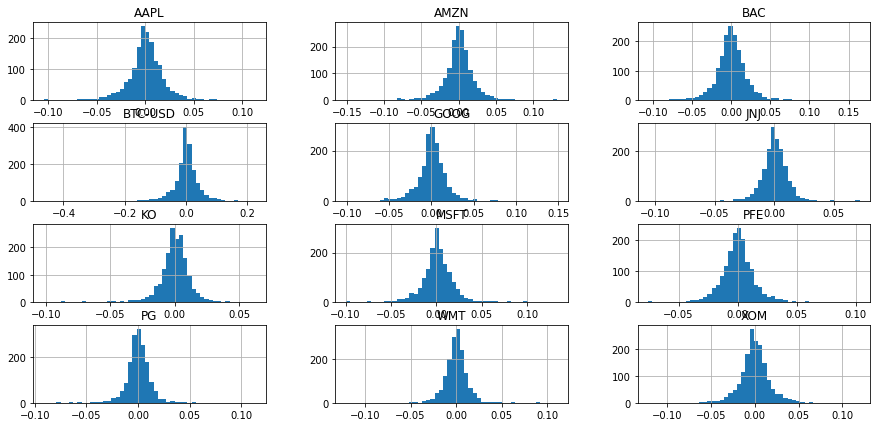

In [ ]:
%matplotlib inline
fig2 = plt.figure(figsize=(15, 7))
ax2 = fig2.add_subplot(1, 1, 1)
returns_portfolio_ln.hist(bins=50, ax=ax2)
ax2.set_xlabel('Return')
ax2.set_ylabel('Frequency')
ax2.set_title('Portfolio Return Distribution')
plt.show()

In [ ]:
(returns_portfolio_ln*100).describe()

Ticker,AAPL,AMZN,BAC,BTC-USD,GOOG,JNJ,KO,MSFT,PFE,PG,WMT,XOM
count,1636.000000,1636.000000,1636.000000,1636.000000,1636.000000,1636.000000,1636.000000,1636.000000,1636.000000,1636.000000,1636.000000,1636.000000
mean,0.054154,0.060042,0.042430,0.067591,0.068033,0.043606,0.020937,0.087130,0.039265,0.031871,-0.002038,0.001648
std,1.840791,2.085288,1.944738,4.181499,1.770856,1.173891,1.185774,1.740012,1.430352,1.226015,1.393808,1.750807
min,-10.492436,-15.139791,-10.577832,-46.473018,-10.131311,-10.578145,-10.172796,-9.964167,-7.573687,-9.142849,-12.076467,-12.142231
25%,-0.771819,-0.847368,-0.957101,-1.495871,-0.663707,-0.501685,-0.465247,-0.682301,-0.671296,-0.515385,-0.626717,-0.826897
50%,0.046148,0.066965,0.029295,0.137913,0.069041,0.033869,0.065081,0.078524,0.000000,0.041331,0.024649,-0.023639
75%,0.975559,0.993360,1.063922,1.874037,0.891621,0.633294,0.603223,0.981545,0.710843,0.617690,0.628861,0.843947
max,11.315748,13.217783,16.378578,22.511895,14.887184,7.177355,6.241840,13.292898,10.305460,11.340937,11.072266,11.944208


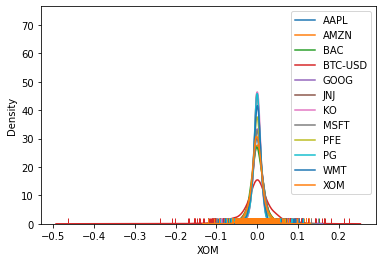

In [ ]:
import seaborn as sns
plt.figure("Test Plots")
for i in returns_portfolio_ln.columns.values:
  sns.distplot(returns_portfolio_ln[i], hist=False, rug=True, label=i)
plt.legend()
plt.show()

In [ ]:
closePriceTable.columns.values

array(['AAPL', 'AMZN', 'BAC', 'BTC-USD', 'GOOG', 'JNJ', 'KO', 'MSFT',
       'PFE', 'PG', 'WMT', 'XOM'], dtype=object)

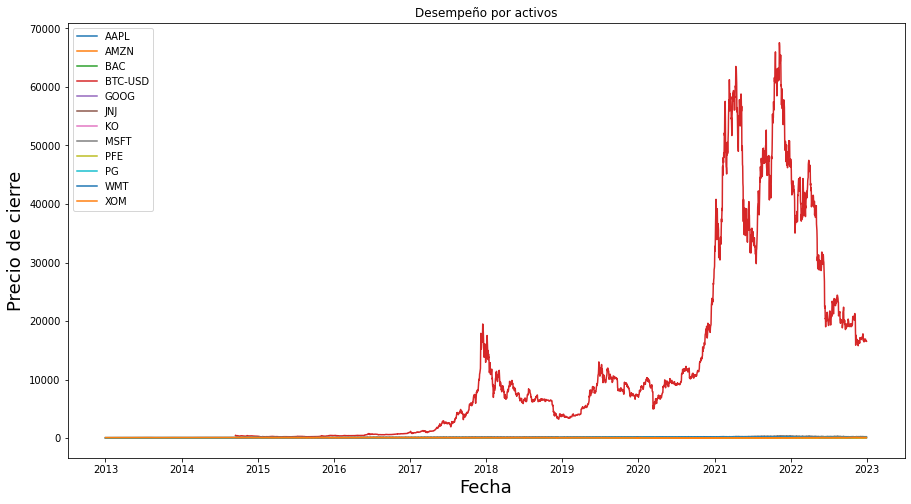

In [ ]:
fig, ax = plt.subplots(figsize=(15,8))

for i in closePriceTable.columns.values :
    ax.plot(closePriceTable[i], label = i)
ax.set_title("Desempeño por activos")
ax.set_xlabel('Fecha', fontsize=18)
ax.set_ylabel('Precio de cierre' , fontsize=18)
ax.legend(closePriceTable.columns.values , loc = 'upper left')
plt.show(fig)

## Matriz de correlaciones

In [ ]:
correlation_matrix = closePriceTable.corr(method='pearson')
correlation_matrix


Ticker,AAPL,AMZN,BAC,BTC-USD,GOOG,JNJ,KO,MSFT,PFE,PG,WMT,XOM
Ticker,,,,,,,,,,,,
AAPL,1.000000,0.902932,0.844092,0.857164,0.964093,0.890808,0.879608,0.981725,0.841113,0.946288,0.925318,-0.429830
AMZN,0.902932,1.000000,0.865475,0.824410,0.924288,0.890501,0.780771,0.945495,0.739174,0.881610,0.923484,-0.691134
BAC,0.844092,0.865475,1.000000,0.838633,0.916403,0.894314,0.824234,0.883694,0.827916,0.804130,0.827297,-0.393117
BTC-USD,0.857164,0.824410,0.838633,1.000000,0.918431,0.781830,0.687525,0.877102,0.668875,0.782102,0.790955,-0.342845
GOOG,0.964093,0.924288,0.916403,0.918431,1.000000,0.910455,0.871236,0.981173,0.854318,0.912732,0.895105,-0.452250
JNJ,0.890808,0.890501,0.894314,0.781830,0.910455,1.000000,0.891727,0.912685,0.851488,0.875493,0.875026,-0.431584
KO,0.879608,0.780771,0.824234,0.687525,0.871236,0.891727,1.000000,0.887198,0.865972,0.908489,0.850942,-0.266316
MSFT,0.981725,0.945495,0.883694,0.877102,0.981173,0.912685,0.887198,1.000000,0.842955,0.956589,0.945816,-0.509108
PFE,0.841113,0.739174,0.827916,0.668875,0.854318,0.851488,0.865972,0.842955,1.000000,0.796323,0.755996,-0.171470


Correlation between Stocks in your portfolio


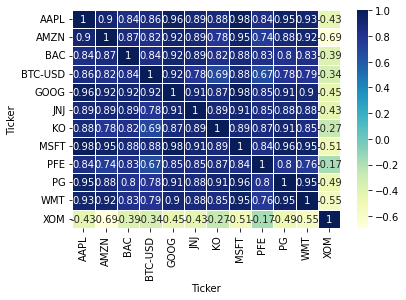

In [ ]:
fig1 = plt.figure()
sns.heatmap(correlation_matrix,xticklabels=correlation_matrix.columns, yticklabels=correlation_matrix.columns,
cmap='YlGnBu', annot=True, linewidth=0.5)
print('Correlation between Stocks in your portfolio')
plt.show(fig1)

## Relación de rendimiento-Riesgo por activo

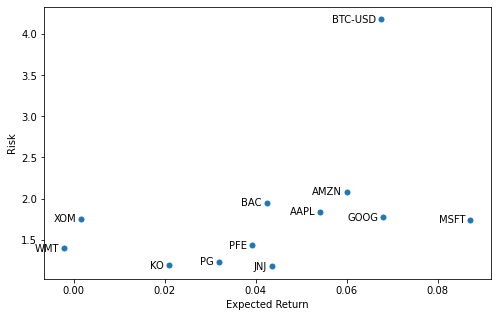

In [ ]:
plt.figure(figsize=(8,5))

plt.scatter((returns_portfolio_ln*100).mean(),(returns_portfolio_ln*100).std(),s=25)

plt.xlabel('Expected Return')
plt.ylabel('Risk')


#For adding annotatios in the scatterplot
for label,x,y in zip(returns_portfolio_ln.columns,(returns_portfolio_ln*100).mean(),(returns_portfolio_ln*100).std()):
    plt.annotate(
    label,
    xy=(x,y),xytext=(-5,-5),
    textcoords = 'offset points', ha = 'right', va = 'bottom',)
    #arrowprops = dict(arrowstyle='->',connectionstyle = 'arc3,rad=-0.5'))

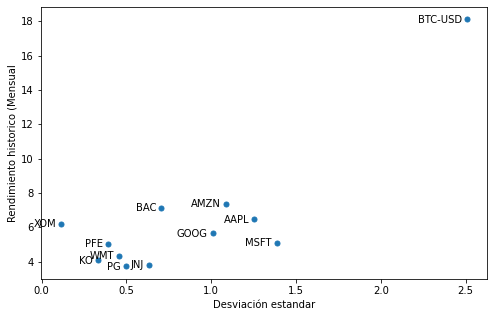

In [ ]:
monthly_returns_ln = np.log(closePriceTable)-np.log(closePriceTable.shift(20))
plt.figure(figsize=(8,5))

plt.scatter((monthly_returns_ln*100).mean(),(monthly_returns_ln*100).std(),s=25)

plt.xlabel('Desviación estandar')
plt.ylabel('Rendimiento historico (Mensual')


#For adding annotatios in the scatterplot
for label,x,y in zip(monthly_returns_ln.columns,(monthly_returns_ln*100).mean(),(monthly_returns_ln*100).std()):
    plt.annotate(
    label,
    xy=(x,y),xytext=(-5,-5),
    textcoords = 'offset points', ha = 'right', va = 'bottom')